In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib import cm
from math import floor,sqrt
import pygmt
%matplotlib inline

In [2]:
import sys
sys.path.append('../')
from topo_stress_tools import *

## Test window function

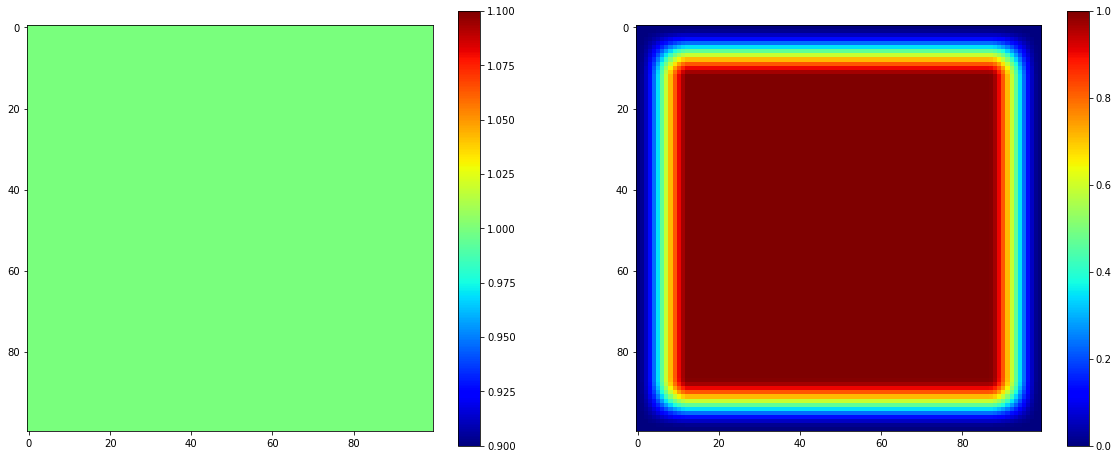

In [14]:
my_grid = np.ones((100,100))
my_window = compute_window(my_grid)
fig, ax = plt.subplots(1,2,figsize=(20,8))
csetA = ax[0].imshow(my_grid, cmap=cm.jet)
fig.colorbar(csetA,ax=ax[0])
csetB = ax[1].imshow(my_window, cmap=cm.jet)
fig.colorbar(csetB,ax=ax[1])

plt.show()

## Test the fft function

In [3]:
lon, lat, topo = read_GMT_netcdf('../../toymodel.nc')
topo_k = fft_grd(topo)
rTopo = fft_grd(topo_k,inv=True)

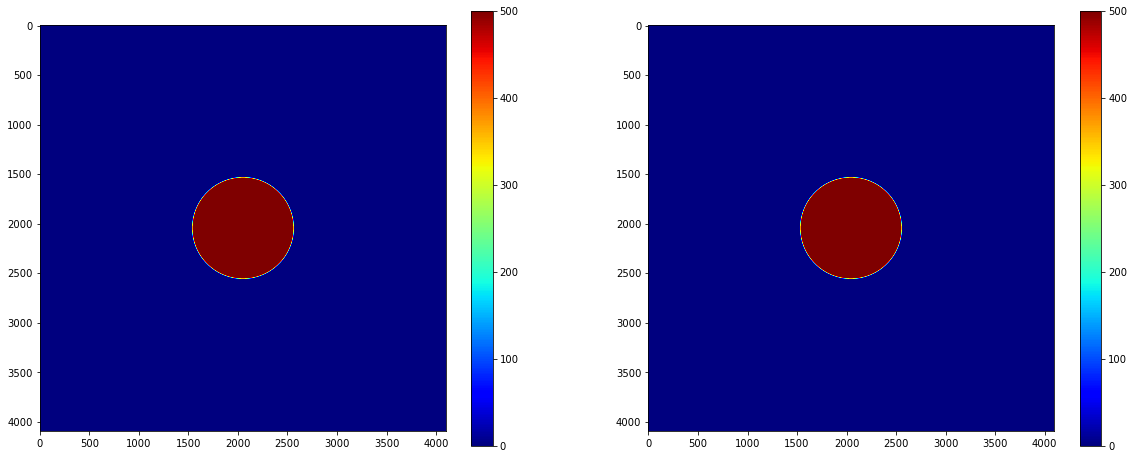

In [4]:
fig, ax = plt.subplots(1,2,figsize=(20,8))
csetA = ax[0].imshow(topo, cmap=cm.jet)
fig.colorbar(csetA,ax=ax[0])
csetB = ax[1].imshow(rTopo.real, cmap=cm.jet)
fig.colorbar(csetB,ax=ax[1])

plt.show()

# Test topo_stress


In [3]:
Txx, Tyy, Tzz, Txy, Txz, Tyz = topo_stress('../../toymodel.nc',-0.5)

In [4]:
lon, lat, _ = read_GMT_netcdf('../../toymodel.nc')
for grid,name in zip([Txx.real, Tyy.real, Tzz.real, Txy.real, Txz.real, Tyz.real],['Txx','Tyy','Tzz','Txy','Txz','Tyz']):
    write_GMT_netcdf('{}.nc'.format(name),lon,lat,grid)

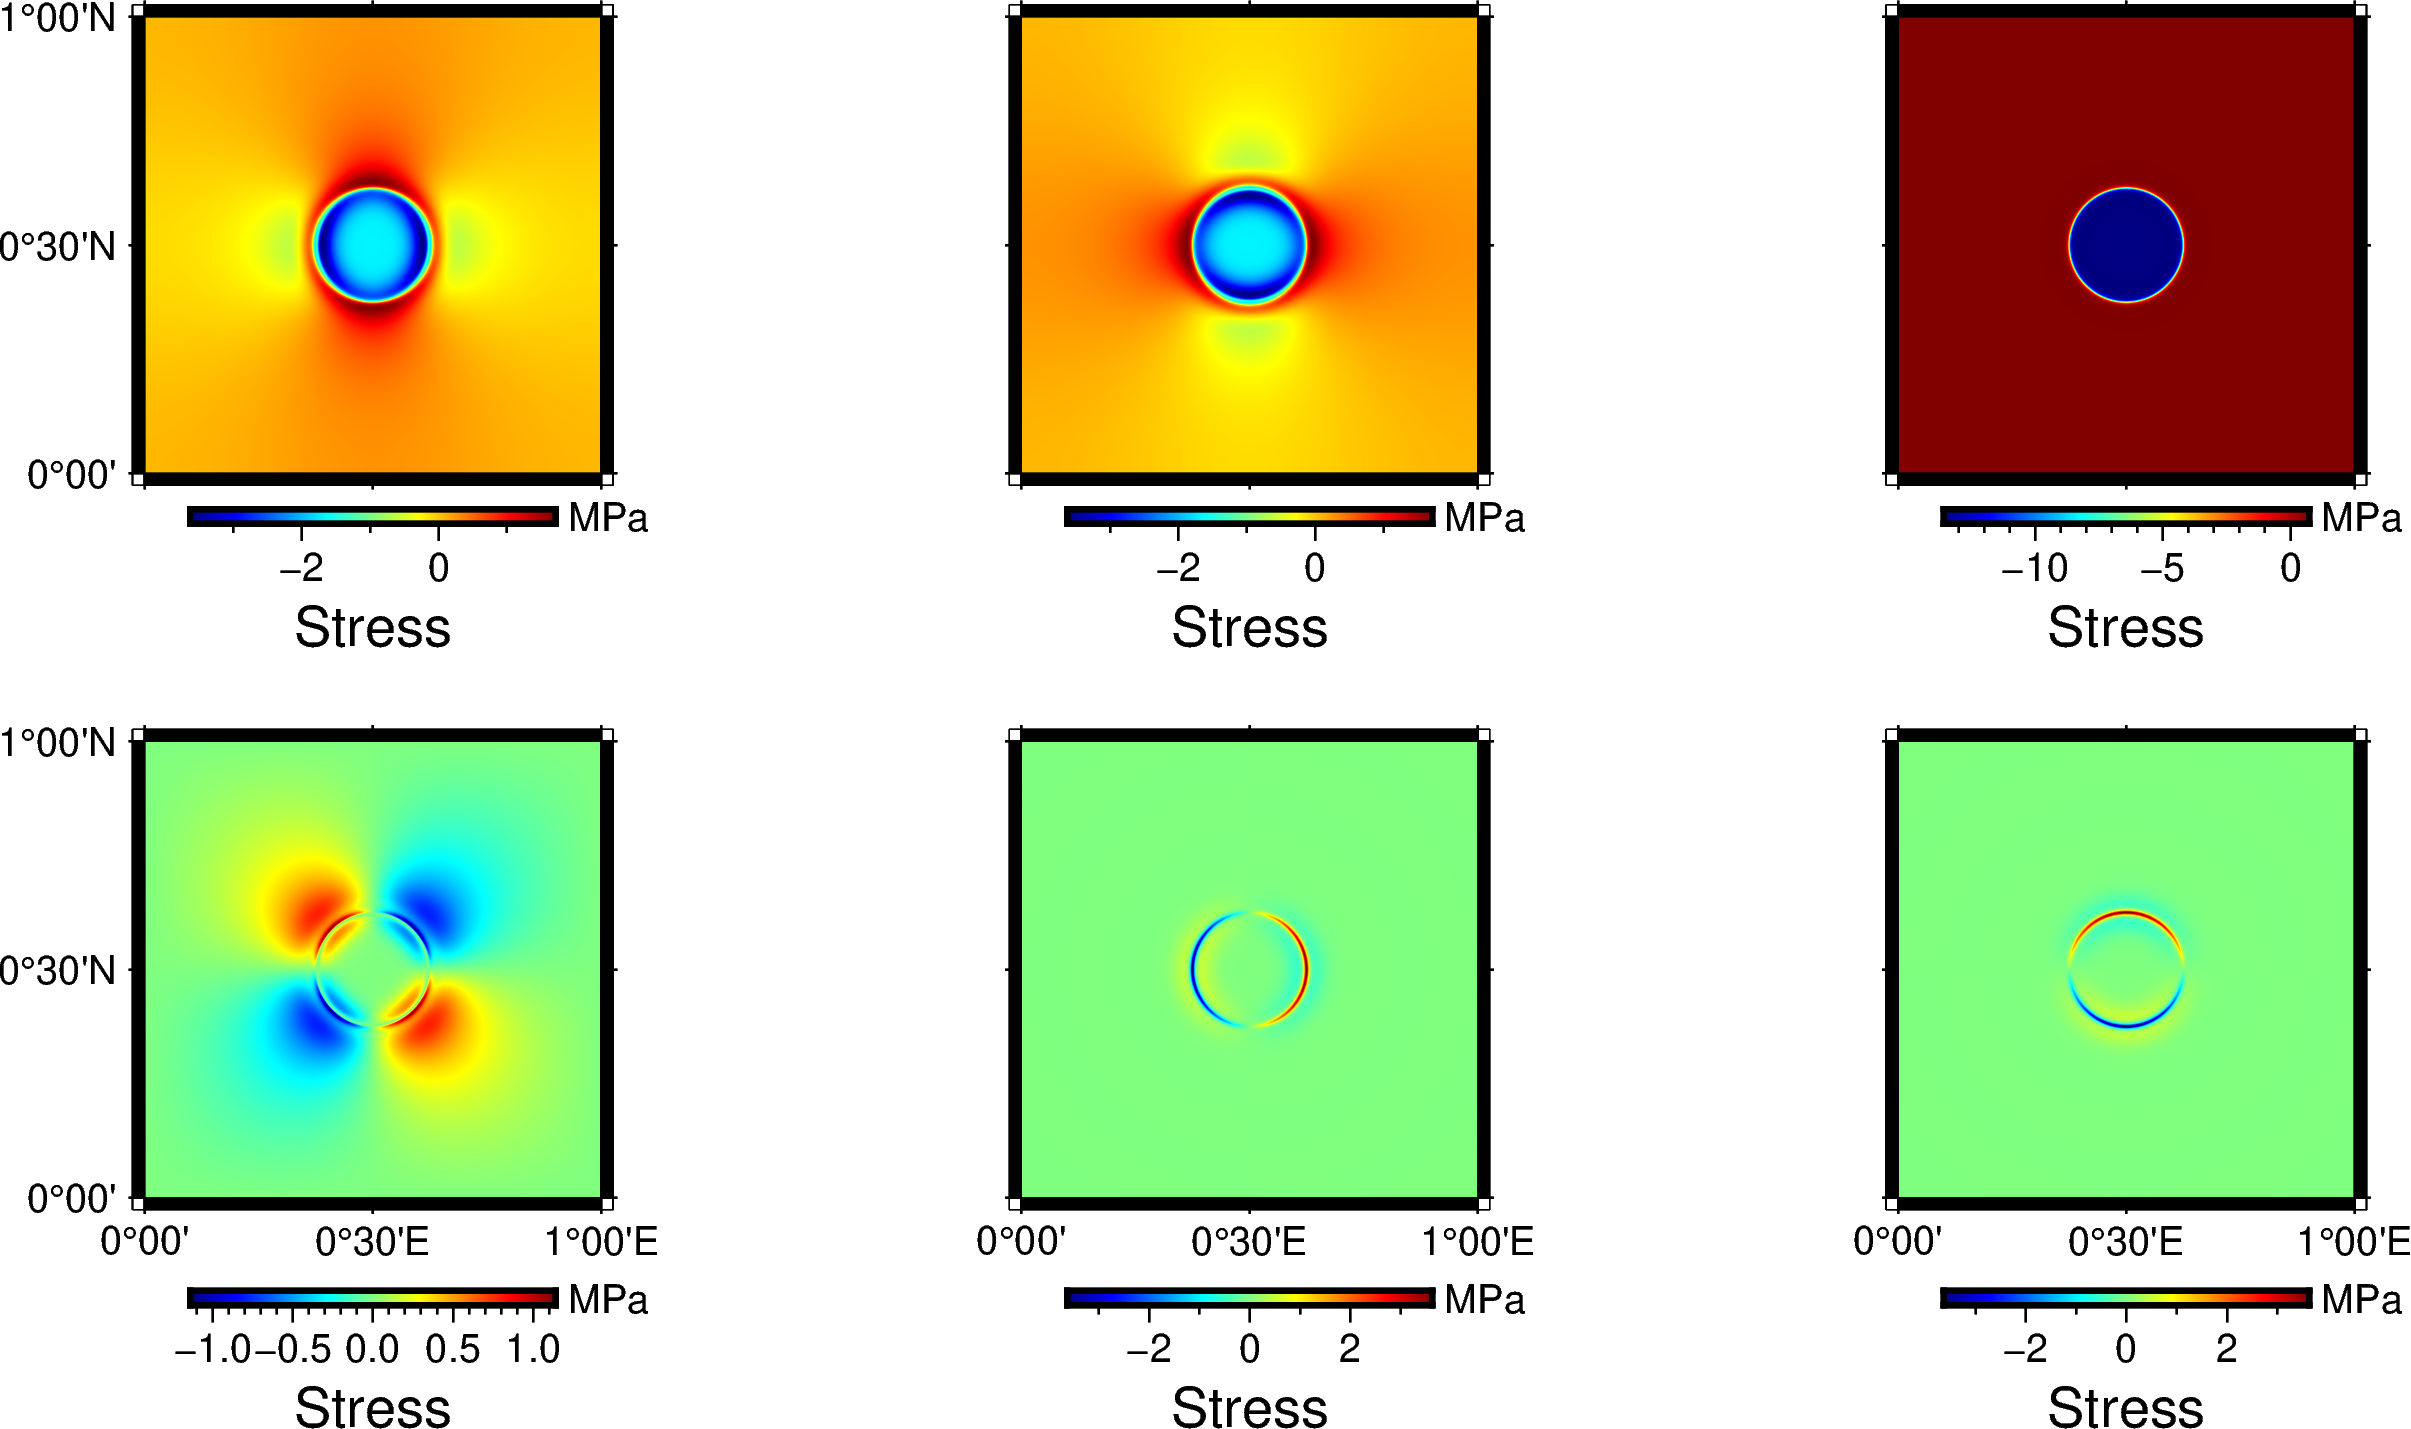

In [7]:
grids = ['Txx','Tyy','Tzz','Txy','Txz','Tyz']
fig = pygmt.Figure()
with fig.subplot(
    nrows=2,ncols=3,
    figsize=('20c','10c'),
    margins=['1c','1c'],
    sharex="b",
    sharey="l",
    frame=["a0.5f1"]
):
    for i in range(2):
        for j in range(3):
            index = i * 3 + j
            with fig.set_panel(panel=index):
                fig.grdimage(grid='{}.nc'.format(grids[index]),cmap='jet')
                fig.colorbar(
                    frame=['x+lStress','y+lMPa'],
                    scale=1e-6
                )
fig.show()

### Fortran routine results

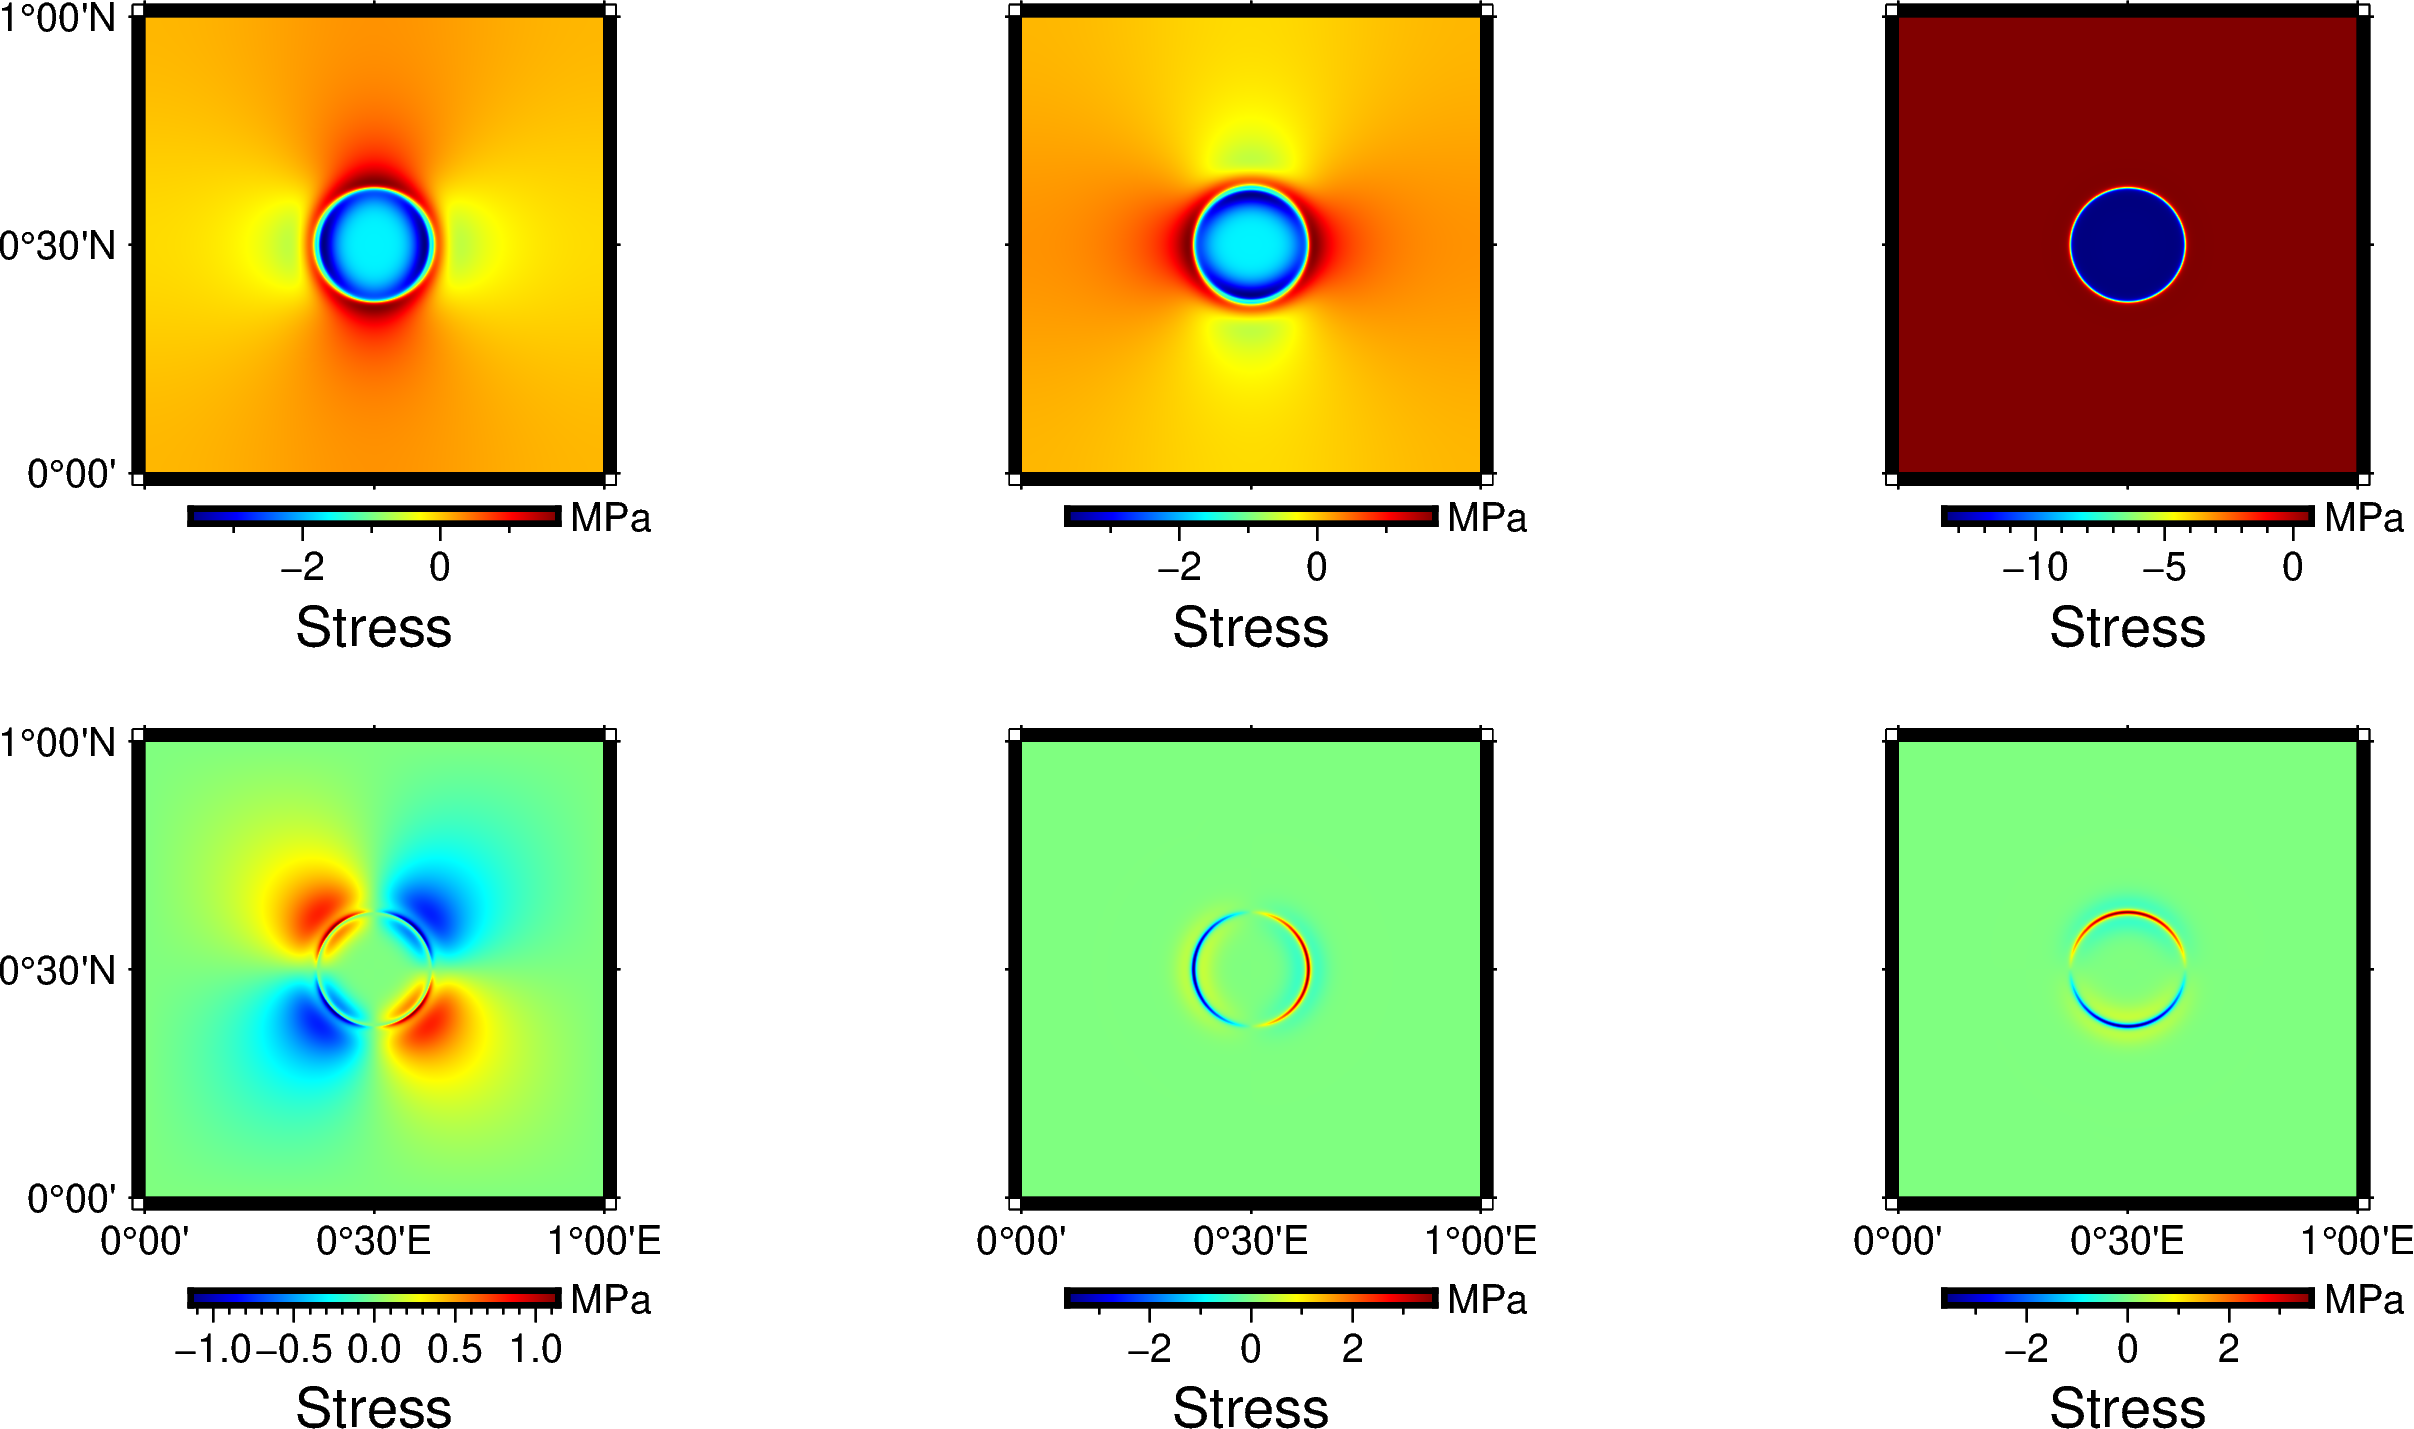

In [7]:
grids = ['Txx','Tyy','Tzz','Txy','Txz','Tyz']
fig = pygmt.Figure()
with fig.subplot(
    nrows=2,ncols=3,
    figsize=('20c','10c'),
    margins=['1c','1c'],
    sharex="b",
    sharey="l",
    frame=["a0.5f1"]
):
    for i in range(2):
        for j in range(3):
            index = i * 3 + j
            with fig.set_panel(panel=index):
                fig.grdimage(
                    grid='../../toy_stress_grds/{}.nc'.format(grids[index]),
                    cmap='jet',
                    projection='M'
                )
                fig.colorbar(
                    frame=['x+lStress','y+lMPa'],
                    scale=1e-6
                )
fig.show()

In [8]:
ni = nj = 4096
ni2 = int(ni/2+1)
nj2 = int(nj/2+1)
dx = dy = 111000
width = nj*dx
height = np.abs(ni*dy)

ky_idx = np.linspace(1,ni2-1,ni2-1)
kyP = (ni2 - 1 - np.flip(ky_idx))/height
kyM = -1*np.linspace(1,ni2-1,ni2-1)/height
ky = np.concatenate((kyP,np.flip(kyM)))

kx_idx = np.linspace(1,nj2-1,nj2-1)
kxP = (nj2 - 1 - np.flip(kx_idx))/width
kxM = -1*np.linspace(1,nj2-1,nj2-1)/width
kx = np.concatenate((kxP,np.flip(kxM)))
kX, kY = np.meshgrid(kx,ky)

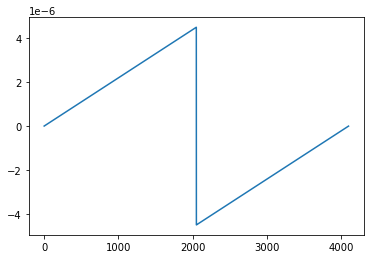

In [9]:
plt.plot(kx)